In [2]:
import pandas as pd
data =pd.read_csv('Mall_Customers.csv')
data.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
22,23,Female,46,25,5
9,10,Female,30,19,72
14,15,Male,37,20,13
108,109,Male,68,63,43
68,69,Male,19,48,59


In [6]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
data = data.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'})
data.sample(5)

,income,score
74,54,47
106,63,50
193,113,91
155,78,89
183,98,88


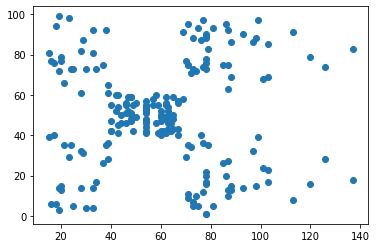

In [8]:
import matplotlib.pyplot as plt
plt.scatter(data['income'],data['score'])

In [10]:
from sklearn.cluster import KMeans
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data[['income','score']])
    wcss_error.append(model.inertia_)

C:\Users\Maclan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss_error

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25012.917069885472,
 21850.165282585633,
 19704.123543147773]

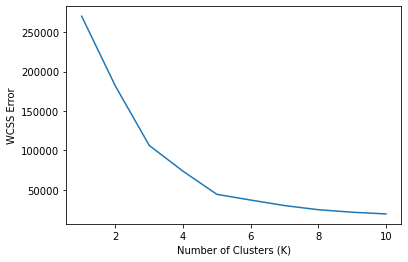

In [12]:
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS Error')
plt.plot(k_values, wcss_error)

In [13]:
model = KMeans(n_clusters=5)
pred = model.fit_predict(data[['income','score']])

In [14]:
pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [15]:
data['cluster'] = pred

In [16]:
data.sample(5)

,income,score,cluster
51,42,60,0
91,59,41,0
165,85,75,1
6,18,6,3
103,62,55,0


In [17]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

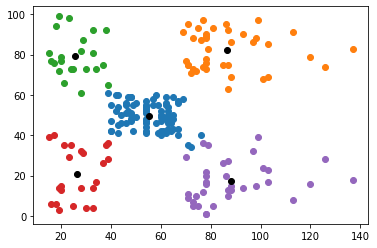

In [23]:
cluster1 =data[data['cluster']==0]
plt.scatter(cluster1['income'],cluster1['score'])

cluster2 =data[data['cluster']==1]
plt.scatter(cluster2['income'],cluster2['score'])

cluster3 =data[data['cluster']==2]
plt.scatter(cluster3['income'],cluster3['score'])

cluster4 =data[data['cluster']==3]
plt.scatter(cluster4['income'],cluster4['score'])

cluster5 =data[data['cluster']==4]
plt.scatter(cluster5['income'],cluster5['score'])

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')